**Position Level vs. Salary Prediction using Neural Networks**

This project demonstrates how to use a deep learning regression model built with PyTorch to predict employee salaries based on their position level. The model learns the non-linear relationship between experience level and salary, producing smooth, data-driven predictions beyond simple linear regression.


In [11]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch import nn

In [2]:
data = pd.read_csv('Position_Salaries.csv')

In [3]:
data= data.apply(pd.to_numeric, errors= 'coerce')

In [4]:
data

,Position,Level,Salary
0,NaN,1,55000
1,NaN,2,75000
2,NaN,3,85000
3,NaN,4,95000
4,NaN,5,120000
5,NaN,6,175000
6,NaN,7,220000
7,NaN,8,245000
8,NaN,9,275000
9,NaN,10,325000


In [5]:
x = torch.Tensor(data.values[:,1]).unsqueeze(dim=1)
y = torch.Tensor(data.values[:,2]).unsqueeze(dim=1)

In [6]:
x,y

(tensor([[ 1.],
         [ 2.],
         [ 3.],
         [ 4.],
         [ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.],
         [11.]]),
 tensor([[ 55000.],
         [ 75000.],
         [ 85000.],
         [ 95000.],
         [120000.],
         [175000.],
         [220000.],
         [245000.],
         [275000.],
         [325000.],
         [375000.]]))

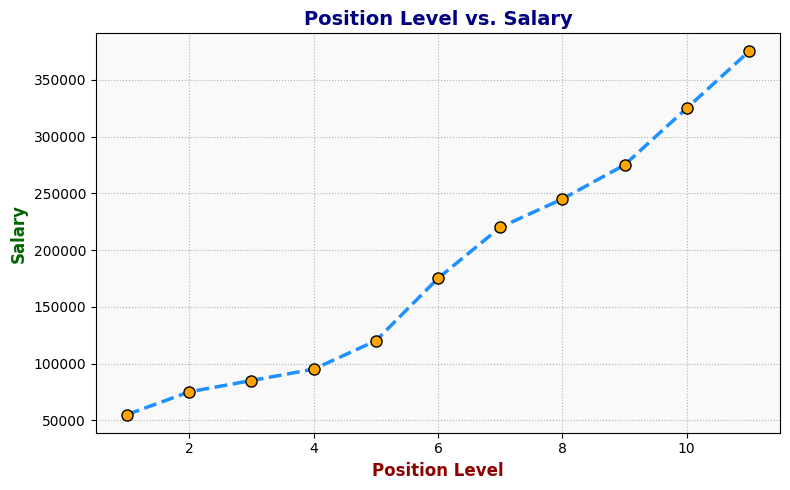

In [10]:




plt.figure(figsize=(8,5))

# Colorful line with markers
plt.plot(
    x, y,
    color='dodgerblue',       # Bright blue line
    linewidth=2.5,
    marker='o',
    markersize=8,
    markerfacecolor='orange',  # Orange markers
    markeredgecolor='black',
    linestyle='--'
)

# Labels and title with styling
plt.xlabel('Position Level', fontsize=12, color='darkred', fontweight='bold')
plt.ylabel('Salary', fontsize=12, color='darkgreen', fontweight='bold')
plt.title('Position Level vs. Salary', fontsize=14, color='navy', fontweight='bold')

# Add grid and colorful background
plt.grid(True, linestyle=':', color='gray', alpha=0.6)
plt.gca().set_facecolor('#f9f9f9')  # Light background

plt.tight_layout()
plt.show()


In [12]:


scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_scaled = torch.Tensor(scaler_x.fit_transform(x))
y_scaled = torch.Tensor(scaler_y.fit_transform(y))

# Then split and train using x_scaled, y_scaled


In [13]:


# Split the data into training and test sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2)


# Print the lengths of the splits
len(x_train), len(x_test), len(y_train), len(y_test)


(8, 3, 8, 3)

In [20]:
model = nn.Sequential(
    nn.Linear(1, 128),   # Input layer: 1 feature → 128 neurons
    nn.ReLU(),          # Activation
    nn.Linear(128, 128),  # Hidden layer: 128 → 128 neurons
    nn.ReLU(),          # Activation
    nn.Linear(128, 1)    # Output layer: 128 → 1 (regression output)
)

print(model)

Sequential(
  (0): Linear(in_features=1, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=1, bias=True)
)


In [23]:
# Define the loss function and optimizer
#loss_fn = nn.L1Loss()  # Mean Absolute Error
loss_fn = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Define the number of epochs
epochs = 100


In [24]:
# Training loop
for epoch in range(epochs):
    model.train()  # Set the model to training mode

    # Forward pass: compute predicted y by passing x to the model
    y_pred = model(x_train)

    # Compute loss
    loss = loss_fn(y_pred, y_train)

    # Zero the gradients, perform backpropagation, and update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Test the model's performance on the test set every 10 epochs
    model.eval()
    with torch.inference_mode():
        y_pred = model(x_test)
        test_loss = loss_fn(y_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss.item()} | Test loss: {test_loss.item()}")


Epoch: 0 | Loss: 0.6411780714988708 | Test loss: 0.03917659446597099
Epoch: 10 | Loss: 0.007832754403352737 | Test loss: 0.006041359156370163
Epoch: 20 | Loss: 0.010395722463726997 | Test loss: 0.04963254928588867
Epoch: 30 | Loss: 0.0008883465779945254 | Test loss: 0.007223356049507856
Epoch: 40 | Loss: 0.0011345616076141596 | Test loss: 0.0008131631766445935
Epoch: 50 | Loss: 8.565325697418302e-05 | Test loss: 0.004655950702726841
Epoch: 60 | Loss: 5.9320278523955494e-05 | Test loss: 0.003225903958082199
Epoch: 70 | Loss: 7.608241139678285e-05 | Test loss: 0.0033792683389037848
Epoch: 80 | Loss: 1.0079190360556822e-05 | Test loss: 0.0033179509919136763
Epoch: 90 | Loss: 5.966571279714117e-06 | Test loss: 0.0030051053036004305


In [26]:

# Set model to evaluation mode
model.eval()

# Inference with no gradients
with torch.inference_mode():
    # Predict scaled outputs
    y_preds_scaled = model(x_scaled)

    # Move to CPU and convert to numpy safely
    y_preds_scaled_np = y_preds_scaled.cpu().numpy()

    # Inverse-transform predictions
    y_preds = scaler_y.inverse_transform(y_preds_scaled_np)



In [27]:
print(y_preds)

[[ 65069.543]
 [ 75108.96 ]
 [ 84775.7  ]
 [ 95074.93 ]
 [119997.07 ]
 [175020.   ]
 [220012.02 ]
 [244979.58 ]
 [275293.44 ]
 [325421.7  ]
 [375637.53 ]]


In [28]:
# Ensure x and predictions are sorted for a smooth line plot
x_plot = x.squeeze() if isinstance(x, torch.Tensor) else x
sorted_idx = np.argsort(x_plot)
x_sorted = np.array(x_plot)[sorted_idx]
y_sorted = y_preds[sorted_idx]




In [29]:
print(x_sorted)
print(y_sorted)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
[[ 65069.543]
 [ 75108.96 ]
 [ 84775.7  ]
 [ 95074.93 ]
 [119997.07 ]
 [175020.   ]
 [220012.02 ]
 [244979.58 ]
 [275293.44 ]
 [325421.7  ]
 [375637.53 ]]


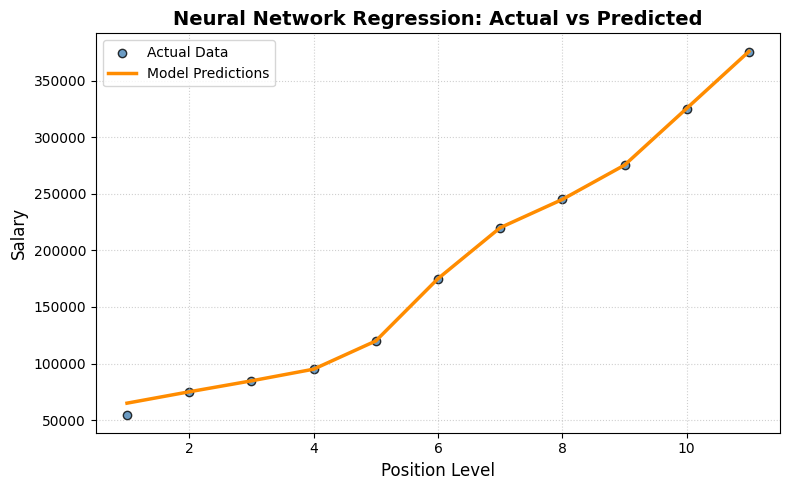

In [30]:
# Plot: make it visually clear and professional
plt.figure(figsize=(8, 5))
plt.style.use('seaborn-v0_8-bright')

plt.scatter(x, y, color='steelblue', label='Actual Data', alpha=0.8, edgecolor='k')
plt.plot(x_sorted, y_sorted, color='darkorange', linewidth=2.5, label='Model Predictions')

plt.title('Neural Network Regression: Actual vs Predicted', fontsize=14, fontweight='bold')
plt.xlabel('Position Level', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.legend(frameon=True)
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

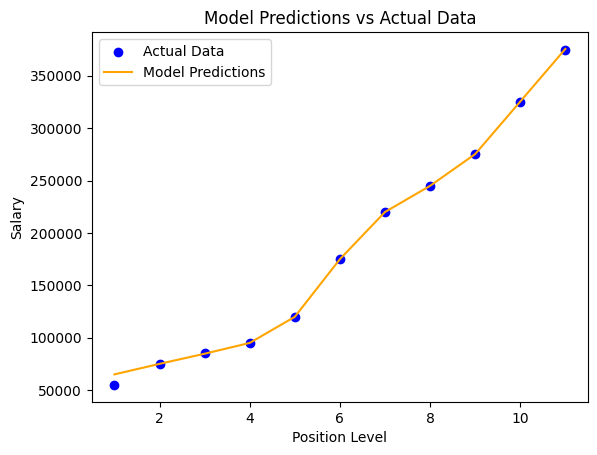

In [31]:
model.eval()
with torch.inference_mode():
    y_preds_scaled = model(x_scaled)
    y_preds = torch.Tensor(scaler_y.inverse_transform(y_preds_scaled.numpy()))

plt.scatter(x, y, label='Actual Data', color='blue')
plt.plot(x, y_preds, label='Model Predictions', color='orange')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Model Predictions vs Actual Data')
plt.legend()
plt.show()


In [32]:
print(y_preds)

tensor([[ 65069.5430],
        [ 75108.9609],
        [ 84775.7031],
        [ 95074.9297],
        [119997.0703],
        [175020.0000],
        [220012.0156],
        [244979.5781],
        [275293.4375],
        [325421.6875],
        [375637.5312]])
